# TP555 - AI/ML

### Lista de Exercícios 2

#### Regressão Linear


5) Em sala de aula, nós discutimos os 3 tipos de algoritmos baseados no gradiente
descendente, batch, estocástico e mini-batch, porém, o código do mini-batch foi o único
que não foi apresentado. Portanto, neste exercício eu peço que vocês:


a) Implementem o algoritmo do mini-batch.

b) Testem suas implementações com a seguinte versão ruidosa da função objetivo
y = 2*x1 + 2*x2 + w, onde x1, x2 e w são M = 1000 valores retirados de uma
distribuição aleatória Gaussiana normal padrão (i.e, com média 0 e variância
igual a 1) e utilizando a função hipótese h = a1*x1 + a2*x2. O objetivo aqui é
verificar que o algoritmo do mini-batch também se aproxima do valor ótimo
(obtido com a equação normal) quando o valor do passo de aprendizagem é
ajustado para seu valor ótimo. (Dica: plotem o gráfico das curvas de contorno
com o histórico dos valores dos pesos)

# Mini lote

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib as xm
from mpl_toolkits.mplot3d import Axes3D

In [29]:
M = 1000

np.random.seed(123456)

x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)
w  = np.random.randn(M, 1)

y = 2 * x1 + 2 * x2 + w

N = 200

a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

h = a1 * x1 + a2 * x2

A1, A2 = np.meshgrid(a1, a2)

In [3]:
J = np.zeros((N, N))

for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2] * x1 + A2[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat))

In [4]:
X = np.c_[x1, x2]

In [5]:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat  = X.dot(a_opt)
J_opt = (1/M)*np.sum(np.power((y - yhat), 2))

In [6]:
n_epochs = 1
alpha_int = 0.35

In [7]:
def learning_schedule(eta_int, epoch):
    return eta_int * np.exp(-epoch)

In [8]:
k = 0.01

def learning_schedule(ls_type, alpha_int, k, t):
    if ls_type == 'exp':
        alpha = alpha_int * np.exp(-k * t)
    else:
        alpha = alpha_int
    return alpha

In [9]:
a = np.array([-10.0, -10.0]).reshape(2, 1)

a_hist = np.zeros((2, n_epochs * M + 1))

a_hist[:, 0] = a.reshape(2,)

In [10]:
alpha_hist = np.zeros((n_epochs * M))

Jgd = np.zeros((n_epochs * M))

Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [11]:
mb_size = 10

In [12]:
inc = 0

grad_hist = np.zeros((2, n_epochs * M))

for epoch in range(n_epochs):
    for i in range(0, M, mb_size):
        random_indexes = random.sample(range(0, M), mb_size)
        xi = X[random_indexes]
        yi = y[random_indexes]
        gradients = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))
        grad_hist[:, epoch * M + inc] = gradients.reshape(2,)
        alpha = learning_schedule('none', alpha_int, k, epoch * M + inc)
        alpha_hist[epoch * M + inc] = alpha
        a = a - alpha * gradients
        a_hist[:,epoch * M + inc + 1] = a.reshape(2,)
        Jgd[epoch * M + inc + 1] = (1/M)*sum(np.power((y - X.dot(a)), 2))
        inc = inc + 1 

c) Plotem a superfície de erro, a superfície de contorno com os parâmetros a1 e a2
para cada iteração do mini-batch, e o gráfico de iteração versus erro

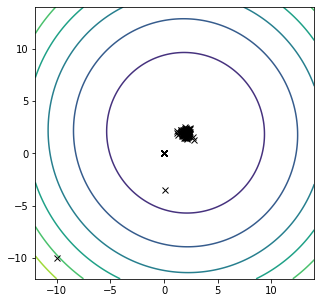

In [34]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

plt.show()

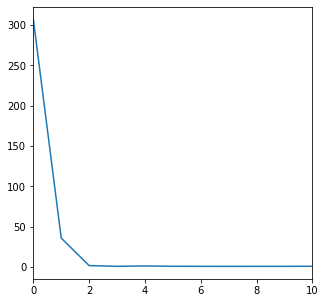

In [37]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim(0,10)

plt.show()

d) Encontrem manualmente (tentativa e erro) o valor ótimo do passo de
aprendizagem (Dica: utilizem os gráficos da superfície de contorno com os
parâmetros a1 e a2 para cada iteração do mini-batch e o gráfico de iteração
versus erro para saber se aquele passo é o ótimo. Acessem os links abaixo para
entender como vocês podem plotar os gráficos de contorno.),


In [38]:
k = 0.01 #EMPIRICAMENTE

e) Comparem os resultados do mini-batch com os resultados obtidos com o GD em
batelada (batch) e GD estocástico (Dica: para a comparação, usem os códigos
que estão nos slides da aula e plotem os gráficos da superfície de contorno com
os parâmetros a1 e a2 para cada iteração, ou seja, o histórico de atualização
dos pesos, e o gráfico de iteração versus o erro para GD em batelada e
estocástico).

# Batelada

In [13]:
a3 = np.linspace(-12.0, 14.0, N)
a4 = np.linspace(-12.0, 14.0, N)

In [14]:
A3, A4 = np.meshgrid(a3, a4)

In [15]:
J1 = np.zeros((N,N))

for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat1 = A2[iter1][iter2] * x1 + A3[iter1][iter2] * x2
        J1[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat1))

In [16]:
X1 = np.c_[x1, x2]

In [17]:
a_opt1 = np.linalg.pinv(np.transpose(X1).dot(X1)).dot(np.transpose(X1).dot(y))
y_hat1  = X1.dot(a_opt1)
J_opt1 = (1/M)*np.sum(np.power((y - yhat1), 2))

In [18]:
n_iter1 = 10000

alpha1 = 0.000001

a_hist1 = np.zeros((2,n_iter1))

Jgd1 = np.zeros((n_iter1))

a1 = np.array([-10.0, -10.0]).reshape(2,1)

a_hist1[:, 0] = a1.reshape(2,)

yhat1 = X1.dot(a)

Jgd1[0] = (1.0/M)*np.sum(np.power(y - yhat1, 2))

error1 = 1

iter1 = 0

In [19]:
while(error1 > 0.001 and iter1 < n_iter1 -1):
    
    h1 = X1.dot(a)
    
    update1 = -(2.0/M)*X1.T.dot(y - h1)
    
    a1 = a1 - alpha1 * update1
    
    a_hist1[:, iter1+1] = a1.reshape(2,)
    
    yhat1 = X1.dot(a)
    
    Jgd1[iter1+1] = (1.0/M)*sum(np.power(y - yhat1, 2))
    
    error1 = np.abs(Jgd1[iter1]-Jgd1[iter1+1])
    
    iter1 = iter1 + 1 

# Estocástico

In [20]:
a5 = np.linspace(-12.0, 16.0, N)
a6 = np.linspace(-12.0, 16.0, N)

A5, A6 = np.meshgrid(a5, a6)

J2 = np.zeros((N, N))

for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat2 = A5[iter1][iter2] * x1 + A6[iter1][iter2] * x2
        J2[iter1][iter2] = (1.0/M)*np.sum(np.square(y - yhat2))

In [21]:
X2 = np.c_[x1,x2]

a_opt2 = np.linalg.pinv(np.transpose(X2).dot(X2)).dot(np.transpose(X2).dot(y))
y_hat2 = X2.dot(a_opt2)
J_opt2 = (1/M)*np.sum(np.power((y - yhat2), 2))

In [22]:
n_epochs2 = 1

alpha2 = 0.1

a2 = np.array([-10.0, -10.0]).reshape(2,1)

a_hist2 = np.zeros((2, n_epochs2 * M + 1))

a_hist2[:, 0] = a.reshape(2,)

Jgd2 = np.zeros(n_epochs2 * M + 1)

Jgd2[0] = (1.0/M)*sum(np.power(y - X2.dot(a), 2))

grad_hist2 = np.zeros((2, n_epochs2 * M))
update_hist2 = np.zeros((2, n_epochs2 * M))
for epoch2 in range(n_epochs2):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients2 = -2.0*xi.T.dot(yi - xi.dot(a2))
        grad_hist2[:, epoch2 * M + i] = gradients2.reshape(2,)
        update2 = alpha2 * gradients2
        update_hist2[:, epoch2 * M + i] = update2.reshape(2,)
        a2 = a2 - update2
        a_hist2[:, epoch2 * M + i + 1] = a2.reshape(2,)
        Jgd2[epoch * M + i + 1] = (1.0/M)*sum(np.power((y - X2.dot(a2)) , 2))

Agora, segue os gráficos para comparação das técnicas

# Mini Lote

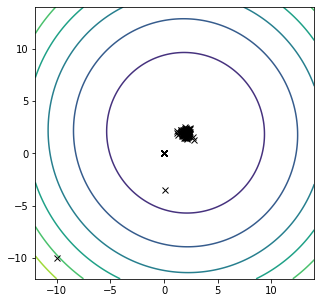

In [35]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

plt.show()

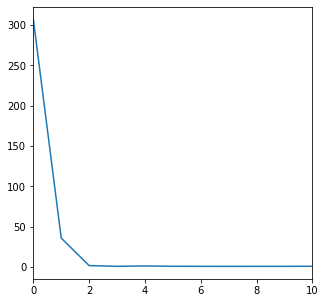

In [36]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim(0,10)

plt.show()

# Batelada

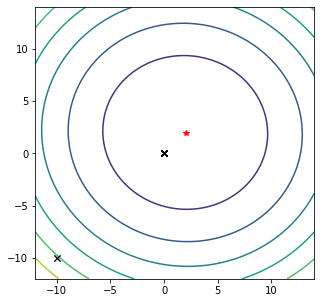

In [25]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A3, A4, J1)
plt.plot(a_opt1[0], a_opt1[1], c='r', marker='*')
plt.plot(a_hist1[0], a_hist1[1], 'kx')

(0.0, 10.0)

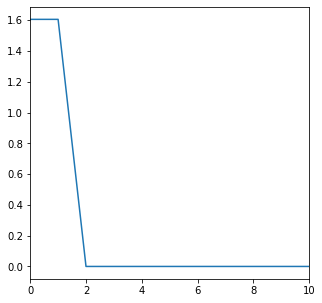

In [26]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), Jgd1[0:inc+1])
plt.xlim(0,10)

# Estocástico

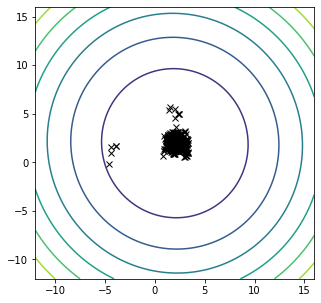

In [27]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A5, A6, J2)

plt.plot(a_opt2[0], a_opt2[1], c='r', marker='*')
plt.plot(a_hist2[0, :], a_hist2[1, :], 'kx')

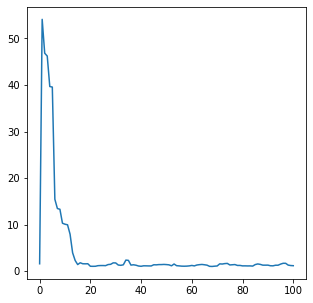

In [28]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), Jgd2[0:inc+1])

e) Baseando-se nos gráficos do item anterior, a que conclusões vocês podem
chegar quanto ao treinamento dos 3 tipos de gradiente descendente?


Os algoritmos no modelo "Batelada" e "Mini lote" tiveram melhores resultados, sendo o estocástico de comportamento muito aleatório (devido ao seu modelo) que não deve ser levado em conta a menos que a quantidade de dados inviabilize o gradiente estocástico e a fração dos dados no modelo mini lote não represente os dados como um todo.